In [65]:
import pandas as pd
import numpy as np
import os

In [66]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
# db1.drop_unuseable_images(commit=True)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
bonsai tree,1235,786,449
laptop,1120,501,619
flower,1670,500,1170
tree,2008,464,1544
headphones,825,425,400
cup of orange juice,556,415,141
car,1493,359,1134
motorcycle,1335,309,1026
helicopter,242,242,0
violin,249,235,14


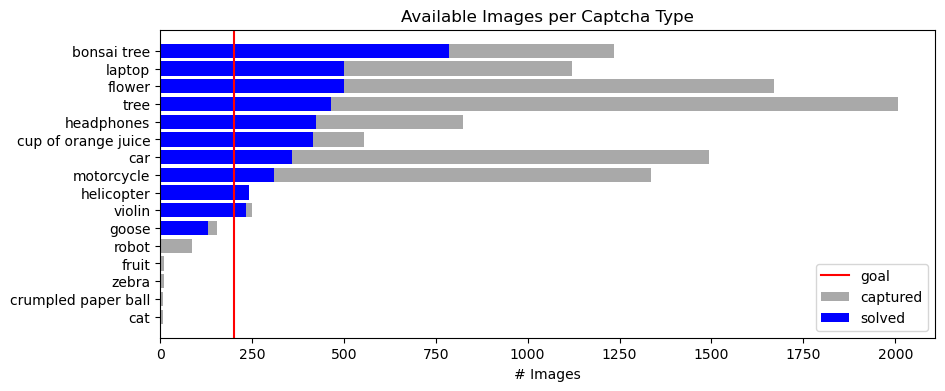

In [67]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [68]:
%run pytorch_training.py
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=10)
train_models_on_all_captcha_strings(db1, threshold=200, save=True)

Training model on bonsai tree with 786 samples...
Training model on bonsai tree...
Fount 786 useable images
x shape: (786, 3, 128, 128)
y shape: (786, 1)
train size: 576, test size: 210
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0027, Accuracy: 157/210, 74.76%
Epoch: 2, Test Loss: 0.0025, Accuracy: 157/210, 74.76%
Epoch: 3, Test Loss: 0.0020, Accuracy: 185/210, 88.10%
Epoch: 4, Test Loss: 0.0014, Accuracy: 185/210, 88.10%
Epoch: 5, Test Loss: 0.0014, Accuracy: 189/210, 90.00%
Epoch: 6, Test Loss: 0.0013, Accuracy: 195/210, 92.86%
Epoch: 7, Test Loss: 0.0012, Accuracy: 192/210, 91.43%
Epoch: 8, Test Loss: 0.0011, Accuracy: 189/210, 90.00%
Epoch: 9, Test Loss: 0.0011, Accuracy: 192/210, 91.43%
Epoch: 10, Test Loss: 0.0011, Accuracy: 192/210, 91.43%
Epoch: 11, Test Loss: 0.0011, Accuracy: 193/210, 91.90%
Epoch: 12, Test Loss: 0.0012, Accuracy: 195/210, 92.86%
Epoch: 13, Test Loss: 0.0012, Accuracy: 193/210, 91.90%
Epoch: 14, Test Loss: 0.0012, Accuracy: 196/210

In [69]:
model_info = db1.get_model_info()
model_info

,date,path,training_samples,testing_samples,accuracy,better_than_90,better_than_95
bonsai tree,2023-08-16,bonsai tree/23-228_01,576,210,0.914286,0.786539,0.019006
laptop,2023-08-15,laptop/23-227_01,368,133,0.947368,0.982850,0.499541
flower,2023-08-15,flower/23-227_01,368,132,0.931818,0.920240,0.216006
tree,2023-08-15,tree/23-227_01,336,128,0.968750,0.999188,0.887323
headphones,2023-08-16,headphones/23-228_01,304,121,0.966942,0.998549,0.859937
cup of orange juice,2023-08-16,cup of orange juice/23-228_03,304,111,0.972973,0.999261,0.920008
car,2023-08-15,car/23-227_01,256,103,0.980583,0.999759,0.967406
motorcycle,2023-08-15,motorcycle/23-227_01,224,85,0.976471,0.998653,0.930050
violin,2023-08-15,violin/23-227_01,176,59,0.830508,0.066589,0.000644
helicopter,2023-08-15,helicopter/23-227_01,176,66,0.893939,0.494087,0.046416


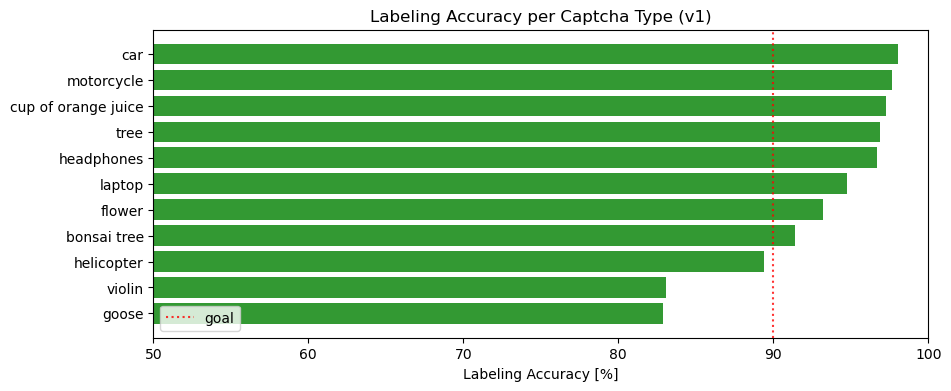

In [70]:
%run visualizer.py
plot_model_accuracy(model_info)

In [71]:
db1.load_models_into_src(threshold=0.9)

bonsai tree bonsai tree/23-228_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree
laptop laptop/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
flower flower/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
tree tree/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//tree
headphones headphones/23-228_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
cup of orange juice cup of orange juice/23-228_03
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
car car/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
motorcycle motorcycle/23-227_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle


In [72]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=100, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-34-602646.png
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-40-253823.png
Captcha V1
cup of orange juice: Added 6 rows to db
Captcha V1
cup of orange juice: Saved 6 images to disk
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-48-654054.png
Captcha V1
headphones      : Added 9 rows to db
Captcha V1
headphones      : Saved 9 images to disk
headphones      : Added 9 rows to db
headphones      : Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/squirrel/16-10-01-54-500926.png
Captcha V1
headphones      : Added 9 rows to db
headphones      : Saved 9 images to

ERROR: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.96)
Stacktrace:
	GetHandleVerifier [0x00007FF7DB8052A2+57122]
	(No symbol) [0x00007FF7DB77EA92]
	(No symbol) [0x00007FF7DB64E3AB]
	(No symbol) [0x00007FF7DB62E1B9]
	(No symbol) [0x00007FF7DB6AB417]
	(No symbol) [0x00007FF7DB6BE24F]
	(No symbol) [0x00007FF7DB6A6DB3]
	(No symbol) [0x00007FF7DB67D2B1]
	(No symbol) [0x00007FF7DB67E494]
	GetHandleVerifier [0x00007FF7DBAAEF82+2849794]
	GetHandleVerifier [0x00007FF7DBB01D24+3189156]
	GetHandleVerifier [0x00007FF7DBAFACAF+3160367]
	GetHandleVerifier [0x00007FF7DB896D06+653702]
	(No symbol) [0x00007FF7DB78A208]
	(No symbol) [0x00007FF7DB7862C4]
	(No symbol) [0x00007FF7DB7863F6]
	(No symbol) [0x00007FF7DB7767A3]
	BaseThreadInitThunk [0x00007FFE71B27034+20]
	RtlUserThreadStart [0x00007FFE71C62651+33]

Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chro

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

Setting images for tree
Setting images for bonsai tree
labeled bonsai tree/12-16-04-57-632259_2.png as False
labeled bonsai tree/12-16-22-29-751605_3.png as False
labeled bonsai tree/12-16-22-33-296307_1.png as True
labeled bonsai tree/12-16-22-37-428961_7.png as True
labeled bonsai tree/12-16-22-46-235955_5.png as True
labeled bonsai tree/12-16-23-11-697629_2.png as False
labeled bonsai tree/12-16-23-19-963457_2.png as False
labeled bonsai tree/12-16-23-45-728392_4.png as False
labeled bonsai tree/12-16-24-17-737258_0.png as False
Setting images for bonsai tree
labeled bonsai tree/12-16-04-54-182884_1.png as False
labeled bonsai tree/12-16-22-30-729197_3.png as False
labeled bonsai tree/12-16-22-33-296307_3.png as False
labeled bonsai tree/12-16-22-40-953300_6.png as False
labeled bonsai tree/12-16-22-47-910485_7.png as False
labeled bonsai tree/12-16-23-00-899605_6.png as False
labeled bonsai tree/12-16-23-03-570926_0.png as True
labeled bonsai tree/12-16-23-53-621166_3.png as False


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-46-235955_0.png as False
labeled bonsai tree/12-16-22-50-581158_5.png as False
labeled bonsai tree/12-16-23-12-541081_3.png as True
labeled bonsai tree/12-16-23-15-105969_8.png as False
labeled bonsai tree/12-16-23-37-618962_0.png as False
labeled bonsai tree/12-16-23-50-100669_7.png as True
labeled bonsai tree/12-16-24-16-927034_1.png as False
labeled bonsai tree/12-16-24-21-370678_0.png as True
labeled bonsai tree/12-16-24-23-052293_8.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-33-296307_4.png as False
labeled bonsai tree/12-16-22-39-264234_6.png as False
labeled bonsai tree/12-16-22-52-187097_6.png as False
labeled bonsai tree/12-16-23-26-943670_1.png as True
labeled bonsai tree/12-16-23-26-943670_8.png as False
labeled bonsai tree/12-16-23-35-917312_7.png as True
labeled bonsai tree/12-16-23-40-281236_5.png as False
labeled bonsai tree/12-16-23-49-155765_3.png as False
labeled bonsai tree/12-16-24-05-387269_6.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-53-028209_7.png as False
labeled bonsai tree/12-16-23-03-570926_7.png as False
labeled bonsai tree/12-16-23-15-105969_2.png as True
labeled bonsai tree/12-16-23-24-275523_7.png as False
labeled bonsai tree/12-16-23-27-829418_3.png as False
labeled bonsai tree/12-16-23-27-829418_4.png as True
labeled bonsai tree/12-16-24-14-545031_1.png as True
labeled bonsai tree/12-16-24-16-927034_8.png as True
labeled bonsai tree/12-16-24-23-052293_7.png as True
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-53-298972_5.png as False
labeled bonsai tree/12-16-04-55-922178_4.png as False
labeled bonsai tree/12-16-22-45-346272_1.png as False
labeled bonsai tree/12-16-22-51-327629_6.png as False
labeled bonsai tree/12-16-23-04-406374_3.png as False
labeled bonsai tree/12-16-23-04-406374_7.png as False
labeled bonsai tree/12-16-23-15-981671_0.png as False
labeled bonsai tree/12-16-23-37-618962_3.png as False
labeled bonsai tree/12-16-23-46-656697_0.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-41-818559_5.png as True
labeled bonsai tree/12-16-22-53-923083_4.png as False
labeled bonsai tree/12-16-23-25-169172_0.png as True
labeled bonsai tree/12-16-23-49-155765_5.png as False
labeled bonsai tree/12-16-23-54-501771_4.png as True
labeled bonsai tree/12-16-23-56-973894_1.png as False
labeled bonsai tree/12-16-24-04-576511_5.png as False
labeled bonsai tree/12-16-24-07-040025_1.png as True
labeled bonsai tree/12-16-24-21-370678_3.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-33-296307_5.png as True
labeled bonsai tree/12-16-22-53-028209_2.png as True
labeled bonsai tree/12-16-22-56-486920_7.png as False
labeled bonsai tree/12-16-23-11-697629_0.png as False
labeled bonsai tree/12-16-23-26-943670_3.png as True
labeled bonsai tree/12-16-23-35-113864_6.png as False
labeled bonsai tree/12-16-23-43-917770_3.png as False
labeled bonsai tree/12-16-23-46-656697_4.png as False
labeled bonsai tree/12-16-23-49-155765_6.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-43-549178_8.png as False
labeled bonsai tree/12-16-22-45-346272_6.png as False
labeled bonsai tree/12-16-22-56-486920_8.png as False
labeled bonsai tree/12-16-23-09-114606_7.png as True
labeled bonsai tree/12-16-23-12-541081_1.png as False
labeled bonsai tree/12-16-23-26-943670_6.png as False
labeled bonsai tree/12-16-23-54-501771_5.png as False
labeled bonsai tree/12-16-24-16-927034_2.png as False
labeled bonsai tree/12-16-24-24-005989_7.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-54-182884_7.png as False
labeled bonsai tree/12-16-22-54-826093_3.png as True
labeled bonsai tree/12-16-22-58-241892_5.png as False
labeled bonsai tree/12-16-23-00-899605_5.png as False
labeled bonsai tree/12-16-23-21-754558_4.png as False
labeled bonsai tree/12-16-23-45-728392_1.png as False
labeled bonsai tree/12-16-24-11-746242_2.png as False
labeled bonsai tree/12-16-24-14-545031_8.png as True
labeled bonsai tree/12-16-24-19-668531_4.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-39-264234_5.png as False
labeled bonsai tree/12-16-22-56-486920_0.png as False
labeled bonsai tree/12-16-23-03-570926_6.png as False
labeled bonsai tree/12-16-23-15-981671_2.png as False
labeled bonsai tree/12-16-23-22-591652_6.png as False
labeled bonsai tree/12-16-23-24-275523_8.png as True
labeled bonsai tree/12-16-23-25-169172_2.png as False
labeled bonsai tree/12-16-23-27-829418_8.png as False
labeled bonsai tree/12-16-23-46-656697_5.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-33-296307_2.png as False
labeled bonsai tree/12-16-22-39-264234_7.png as False
labeled bonsai tree/12-16-22-40-953300_2.png as False
labeled bonsai tree/12-16-22-51-327629_4.png as False
labeled bonsai tree/12-16-23-14-224529_4.png as False
labeled bonsai tree/12-16-23-21-754558_7.png as False
labeled bonsai tree/12-16-23-44-917848_7.png as False
labeled bonsai tree/12-16-23-55-292030_0.png as False
labeled bonsai tree/12-16-24-02-813775_7.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-23-10-848513_7.png as True
labeled bonsai tree/12-16-23-22-591652_7.png as False
labeled bonsai tree/12-16-23-32-584045_3.png as False
labeled bonsai tree/12-16-23-33-423210_6.png as False
labeled bonsai tree/12-16-23-44-917848_0.png as False
labeled bonsai tree/12-16-23-52-746745_2.png as True
labeled bonsai tree/12-16-23-52-746745_7.png as False
labeled bonsai tree/12-16-23-59-653084_5.png as True
labeled bonsai tree/12-16-24-17-737258_7.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-30-729197_2.png as False
labeled bonsai tree/12-16-22-30-729197_4.png as True
labeled bonsai tree/12-16-22-40-953300_1.png as True
labeled bonsai tree/12-16-22-43-549178_2.png as True
labeled bonsai tree/12-16-22-53-028209_3.png as False
labeled bonsai tree/12-16-22-54-826093_7.png as True
labeled bonsai tree/12-16-22-56-486920_3.png as False
labeled bonsai tree/12-16-23-37-618962_5.png as True
labeled bonsai tree/12-16-23-56-973894_7.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-04-53-298972_2.png as False
labeled bonsai tree/12-16-22-47-910485_6.png as True
labeled bonsai tree/12-16-22-50-581158_3.png as False
labeled bonsai tree/12-16-23-00-025255_8.png as False
labeled bonsai tree/12-16-23-15-105969_6.png as False
labeled bonsai tree/12-16-23-45-728392_8.png as False
labeled bonsai tree/12-16-23-50-100669_3.png as False
labeled bonsai tree/12-16-23-50-100669_8.png as True
labeled bonsai tree/12-16-24-21-370678_8.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled bonsai tree/12-16-22-30-729197_5.png as True
labeled bonsai tree/12-16-22-37-428961_1.png as False
labeled bonsai tree/12-16-22-47-028552_4.png as False
labeled bonsai tree/12-16-22-53-028209_6.png as False
labeled bonsai tree/12-16-22-53-923083_8.png as False
labeled bonsai tree/12-16-23-33-423210_3.png as True
labeled bonsai tree/12-16-23-37-618962_1.png as False
labeled bonsai tree/12-16-23-50-100669_2.png as False
labeled bonsai tree/12-16-24-11-746242_6.png as False
Setting images for bonsai tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))